In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
font_size = 13
figsize = (6, 3)
rcParams = {
    "font.size": font_size,
    "font.family": "serif",
    "font.serif": "Times New Roman",
}
sns.set_theme(context="notebook", style="whitegrid", palette="colorblind", rc=rcParams)
sf_map = {"ce_loss": "CELoss", "cum_acc": "CumAcc", "fit": "FIT", "pd": "PD"}

In [4]:
def mean_corr(df: pd.DataFrame):
    return df.values[np.triu_indices_from(df, k=1)].mean()


def melt_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.melt(id_vars="sf", var_name="Ensemble Size", value_name="Correlation")
    df["sf"] = df["sf"].map(sf_map)
    return df


def create_correlation(path: str) -> pd.DataFrame:
    rows = []
    for sf in ["ce_loss", "cum_acc", "fit", "pd"]:
        corrs = []
        for i in range(1, 6):
            df = pd.read_csv(
                os.path.join(path, f"agg_seed_{i}_{sf}.csv"),
                index_col=0,
            )
            corrs.append(mean_corr(df))
        rows.append([sf] + corrs)
    return pd.DataFrame(rows, columns=["sf", 1, 2, 3, 4, 5])

In [5]:
os.makedirs("results/tables", exist_ok=True)
os.makedirs("results/figures", exist_ok=True)
cifar_df = create_correlation("results/cifar/curriculum")
dcase_df = create_correlation("results/dcase/curriculum")
cifar_df.to_csv("results/tables/4_b_2_robustness_ensemble_cifar.csv", index=False)
dcase_df.to_csv("results/tables/4_b_2_robustness_ensemble_dcase.csv", index=False)
cifar_df = melt_df(cifar_df)
dcase_df = melt_df(dcase_df)

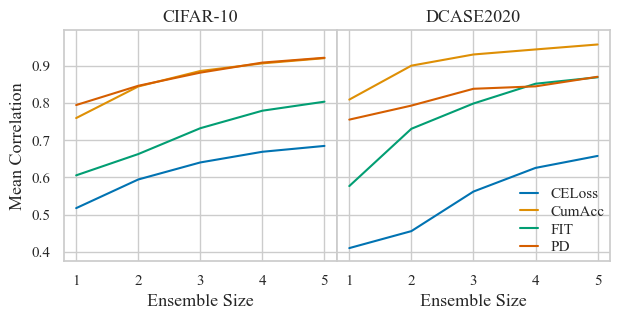

In [18]:
fig = plt.figure(figsize=figsize)
for i, df in enumerate([cifar_df, dcase_df]):
    ax = fig.add_subplot(1, 2, i + 1)
    sns.lineplot(data=df, x="Ensemble Size", y="Correlation", hue="sf", ax=ax)
    ax.set_title("CIFAR-10" if i == 0 else "DCASE2020", fontsize=font_size)
    ax.set_xlabel("Ensemble Size", fontsize=font_size)
    ax.set_ylabel("Mean Correlation", fontsize=font_size)
    ax.set_ylim(bottom=0.375, top=0.995)
    ax.get_legend().remove()
    if i == 1:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel("")
        plt.subplots_adjust(wspace=0)
        plt.legend(
            title=None,
            frameon=False,
            loc="lower right",
            bbox_to_anchor=(1.03, -0.03),
            handlelength=1.2,
            fontsize=font_size - 2,
            labelspacing=0.25,
        )
plt.tight_layout(pad=0)
plt.savefig("results/figures/4_b_2_robustness_ensemble.pdf", dpi=300)